In [3]:
import numpy as np
import os
notebook_path = os.path.abspath("plotter.ipynb")
from scipy.io import loadmat
import matplotlib.pyplot as plt
from tbparse import SummaryReader
from matplotlib.lines import Line2D

2023-06-05 10:28:05.976371: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 10:28:06.035404: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 10:28:06.036682: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 10:28:06.985337: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Info

- All trained models are located in /results/subnetworks/...
- All evaluations ran with utils through main.py are located as MAT files in /results/evaluation/

How to plot:
Most functions requires the lists: runs (Logs/evaluatios to plot), labels (Labels on figure), and fname (figure save destination)

## Plotting of training curves
Files are located in the log folder

- Training models: MAQN and MAPPO
- Benchmarks: Random, greedy, centralised, and distributed
- Federated data: $T^{\text{Agg}}=128,256,512,1024$

In [25]:
# MADDQN and DATA RATE
runs = [['maddqn', 'c-rate'], ['maddqn_dec', 'd-rate'], 
        ['maddqn_fed', 'f-rate-128'], ['maddqn_fed', 'f-rate-256'], ['maddqn_fed', 'f-rate-512'], ['maddqn_fed', 'f-rate-1024']]
labels = ['C-MADDQN', 'D-MADDQN', "F-MADDQN: $T^{" + str('Agg') + "}=128$", "F-MADDQN: $T^{" + str('Agg') + "}=256$", "F-MADDQN: $T^{" + str('Agg') + "}=512$", "F-MADDQN: $T^{" + str('Agg') + "}=1024$"]
fname = 'train_maddqn_rate.pdf'

In [19]:
# MAPPO and DATA RATE
runs = [['mappo', 'c-rate'], ['mappo_dec', 'd-rate'], 
        ['mappo_fed', 'f-rate-128'], ['mappo_fed', 'f-rate-256'], ['mappo_fed', 'f-rate-512'], ['mappo_fed', 'f-rate-1024']]
labels = ['C-MAPPO', 'D-MAPPO', "F-MAPPO: $T^{" + str('Agg') + "}=128$", "F-MAPPO: $T^{" + str('Agg') + "}=256$", "F-MAPPO: $T^{" + str('Agg') + "}=512$", "F-MAPPO: $T^{" + str('Agg') + "}=1024$"]
fname = 'train_mappo_rate.pdf'

In [21]:
# MADDQN and BINARY
runs = [['maddqn', 'c-bina'], ['maddqn_dec', 'd-bina'], 
        ['maddqn_fed', 'f-bina-128'], ['maddqn_fed', 'f-bina-256'], ['maddqn_fed', 'f-bina-512'], ['maddqn_fed', 'f-bina-1024']]
labels = ['C-MADDQN', 'D-MADDQN', "F-MADDQN: $T^{" + str('Agg') + "}=128$", "F-MADDQN: $T^{" + str('Agg') + "}=256$", "F-MADDQN: $T^{" + str('Agg') + "}=512$", "F-MADDQN: $T^{" + str('Agg') + "}=1024$"]
fname = 'train_maddqn_binary.pdf'

In [23]:
# MAPPO and BINARY
runs = [['mappo', 'c-bina'], ['mappo_dec', 'd-bina'], 
        ['mappo_fed', 'f-bina-128'], ['mappo_fed', 'f-bina-256'], ['mappo_fed', 'f-bina-512'], ['mappo_fed', 'f-bina-1024']]
labels = ['C-MAPPO', 'D-MAPPO', "F-MAPPO: $T^{" + str('Agg') + "}=128$", "F-MAPPO: $T^{" + str('Agg') + "}=256$", "F-MAPPO: $T^{" + str('Agg') + "}=512$", "F-MAPPO: $T^{" + str('Agg') + "}=1024$"]
fname = 'train_mappo_binary.pdf'

In [17]:
# MAPPO (appendix: joint allocation)
reward = 'rate'
runs = [['mappo', f'joint-c-{reward}']]
labels = ['C-MAPPO']
fname = 'train_joint.pdf'

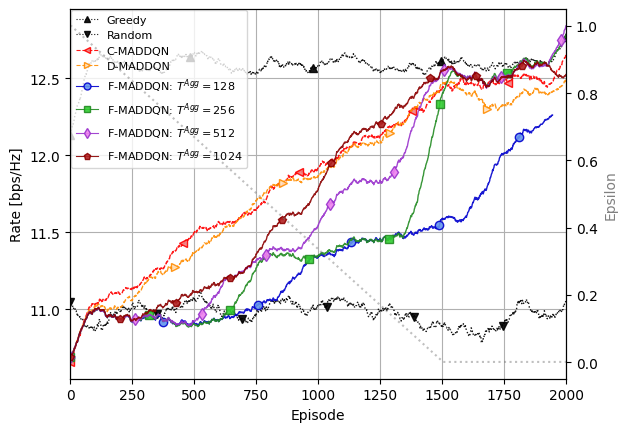

In [26]:
# Random and greedy are automatically added as the first entries:
plot_settings = [{'c': 'red', 'linestyle': 'dashed', 'marker': '<', 'marker_c': 'lightcoral'},
                 {'c': 'darkorange', 'linestyle': 'dashed', 'marker': '>', 'marker_c': 'bisque'},
                 {'c': 'mediumblue', 'linestyle': 'solid', 'marker': 'o', 'marker_c': 'cornflowerblue'},
                 {'c': 'forestgreen', 'linestyle': 'solid', 'marker': 's', 'marker_c': 'limegreen'},
                 {'c': 'darkorchid', 'linestyle': 'solid', 'marker': 'd', 'marker_c': 'violet'},
                 {'c': 'darkred', 'linestyle': 'solid', 'marker': 'p', 'marker_c': 'firebrick'}]
window_size = 150
save_file = False

# Get data
train_data = []
train_labels = []
for i, ((alg, run), label) in enumerate(zip(runs, labels)):
    fpath = f'subnetworks/factory/{alg}/sparse/{run}/logs/'
    if i == 0:
        for _fpath in os.listdir(fpath): # Make sure greedy is second
            if 'greedy_reward' in _fpath and i == 0:
                reader = SummaryReader(fpath + _fpath)
                df = reader.scalars
                plot_settings.insert(0, {'c': 'black', 'linestyle': 'dotted', 'marker': '^', 'marker_c': 'black'})
                train_data.append(df["value"])
                train_labels.append('Greedy')
        for _fpath in os.listdir(fpath): # Make sure random is first
            if 'random_reward' in _fpath and i == 0:
                reader = SummaryReader(fpath + _fpath)
                df = reader.scalars
                plot_settings.insert(1, {'c': 'black', 'linestyle': 'dotted', 'marker': 'v', 'marker_c': 'black'})
                train_data.append(df["value"])
                train_labels.append('Random')
    for _fpath in os.listdir(fpath): # Go through rest of training data
        if 'train_reward' in _fpath:
            reader = SummaryReader(fpath + _fpath)
            df = reader.scalars
            train_data.append(df["value"])
            train_labels.append(label)
        elif 'epsilon' in _fpath and 'MADDQN' in label:
            reader = SummaryReader(fpath + _fpath)
            df = reader.scalars
            epsilon = df["value"]

# Plot data
#fig, ax = plt.subplots(figsize=(6.4, 0.9158*4.8))
fig, ax = plt.subplots()
if 'MADDQN' in labels[0]:
    ax2 = ax.twinx()
    ax2.plot(np.arange(len(epsilon)), epsilon, c='grey', alpha=1/2, linestyle='dotted')
    ax2.set_ylabel('Epsilon', c='grey')
    ax.set_xlim([0,2000])
else:
    ax.set_xlim([0,1000])


for i, (data, label, cfg) in enumerate(zip(train_data, train_labels, plot_settings)):

    data_pad = np.pad(data, (window_size//2, window_size-1-window_size//2), mode='edge')
    data_smooth = np.convolve(data_pad, np.ones((window_size,))/window_size, mode='valid') 
    ax.plot(data_smooth, label=label, c=cfg['c'], 
                linestyle=cfg['linestyle'], alpha=9/10, linewidth=1, marker=cfg['marker'], 
                markevery=0.2 + ((len(train_labels))-(i+1))*0.05, mfc=cfg['marker_c'], mec=cfg['c'], rasterized=True)

#leg = ax.legend(bbox_to_anchor=(0., 1.0, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., scatterpoints=2, fontsize=8)
#leg.get_frame().set_edgecolor('black')
#leg.get_frame().set_boxstyle('square', pad=0.)

leg = ax.legend(borderaxespad=0.1, scatterpoints=1, fontsize=8)
for line in leg.get_lines():
    line.set_linewidth(0.8)
    line.set_markersize(5.0)

ax.grid()
ax.set_xlabel('Episode')

if any('rate' in x for _, x in runs):
    ax.set_ylabel('Rate [bps/Hz]')
    case = 'rate'
elif any('sinr' in x for _, x in runs):
    ax.set_ylabel('SINR [dB]')
    case = 'sinr'
elif any('bina' in x for _, x in runs):
    ax.set_ylabel('Binary reward [$\\cdot$]')
    case = 'bina'

if save_file:
    fig.savefig(fname, bbox_inches='tight', dpi=100)

## Plotting of training time
Files are located in the log folder

- Bar graphs of the total training time (time on y-axis and RL algorithms on x-axis)
- y-axis: Time
- x-axis: C-MADDQN, C-MAPPO, D-MADDQN, D-MAPPO, F-MADDQN, F-MAPPO 

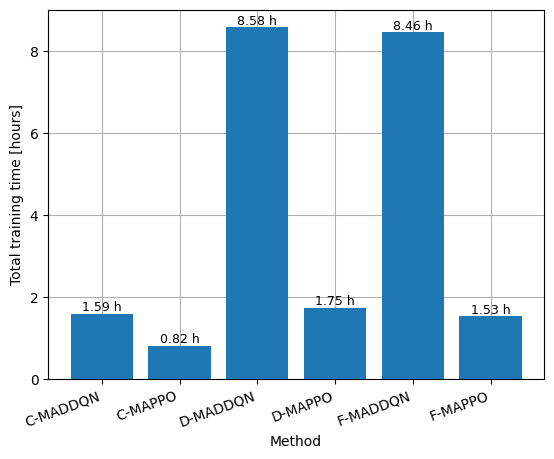

In [29]:
# run
runs = [['maddqn', ['c-rate', 'c-bina']],
        ['mappo-error', ['c-rate', 'c-bina']],
        ['maddqn_dec', ['d-rate', 'd-bina']], 
        ['mappo_dec-error', ['d-rate', 'd-bina']], 
        #['maddqn_fed', ['f-rate-512', 'f-bina-512']], 
        #['mappo_fed-error', ['f-rate-512', 'f-bina-512']]]
        ['maddqn_fed', ['f-rate-128', 'f-rate-256', 'f-rate-512', 'f-rate-1024', 'f-bina-128', 'f-bina-256', 'f-bina-512', 'f-bina-1024']], 
        ['mappo_fed-error', ['f-rate-128', 'f-rate-256', 'f-rate-512', 'f-rate-1024', 'f-bina-128', 'f-bina-256', 'f-bina-512', 'f-bina-1024']]]
labels = ['C-MADDQN', 'C-MAPPO', 'D-MADDQN', 'D-MAPPO', 'F-MADDQN', 'F-MAPPO']

# Get data
save_fig = True
time_data = []
for i, ((alg, _runs), label) in enumerate(zip(runs, labels)):
    time = []
    if 'maddqn' in alg:
        epi_converge = 1500
    elif 'mappo' in alg:
        epi_converge = 750
    for run in _runs:
        fpath = f'subnetworks/factory/{alg}/sparse/{run}/logs/'
        for _fpath in os.listdir(fpath):
            if 'FPS' in _fpath:
                reader = SummaryReader(fpath + _fpath)
                df = reader.scalars
                data = np.sum(1 / (df["value"][:epi_converge-1] * (1 / 200)))/60/60
                time.append(data)
    time_data.append(np.mean(np.array(time)))

# Plot data
fig, ax = plt.subplots()
ax.grid(zorder=1)
for i, (data, label) in enumerate(zip(time_data, labels)):
    ax.bar(i, data, label=label, zorder=3, color='C0')
    ax.text(i, data-0.001, f'{np.round(data,2)} h', fontsize=9, c='black',
        horizontalalignment='center', verticalalignment='bottom')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=20, ha='right')
ax.yaxis.get_major_locator().set_params(integer=True)
ax.set_ylabel('Total training time [hours]')
ax.set_xlabel('Method')

if save_file:
    fig.savefig('training_time.pdf', bbox_inches='tight', dpi=100)

## Plotting of evaluation files
Files are located in the evaluation folder.

This function take ages to run! May be simplified by just ignoring some of the samples by indexing [::2], as arrays has already been sorted.


- Training models: MAQN and MAPPO
- Benchmarks: Random, greedy, centralised, and distributed
- Federated data: Only the best of $128,256,512,1024$, which is $T^{\text{Agg}}=512$

In [89]:
# MADDQN and MAPPO with DATA RATE
ep = 1000
t_agg = 512
runs = [f'benchmarks_sparse_{ep}ep.mat', 
        f'maddqn_c-rate_sparse_{ep}ep.mat',f'maddqn_dec_d-rate_sparse_{ep}ep.mat',f'maddqn_fed_f-rate-{t_agg}_sparse_{ep}ep.mat',
        f'mappo_c-rate_sparse_{ep}ep.mat',f'mappo_dec_d-rate_sparse_{ep}ep.mat',f'mappo_fed_f-rate-{t_agg}_sparse_{ep}ep.mat']
fname = 'evaluation_rate.pdf'

In [46]:
# MADDQN and MAPPO with BINARY
ep = 1000
t_agg = 512
runs = [f'benchmarks_sparse_{ep}ep.mat', 
        f'maddqn_c-bina_sparse_{ep}ep.mat',f'maddqn_dec_d-bina_sparse_{ep}ep.mat',f'maddqn_fed_f-bina-{t_agg}_sparse_{ep}ep.mat',
        f'mappo_c-bina_sparse_{ep}ep.mat',f'mappo_dec_d-bina_sparse_{ep}ep.mat',f'mappo_fed_f-bina-{t_agg}_sparse_{ep}ep.mat']
fname = 'evaluation_binary.pdf'

/home/coder/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


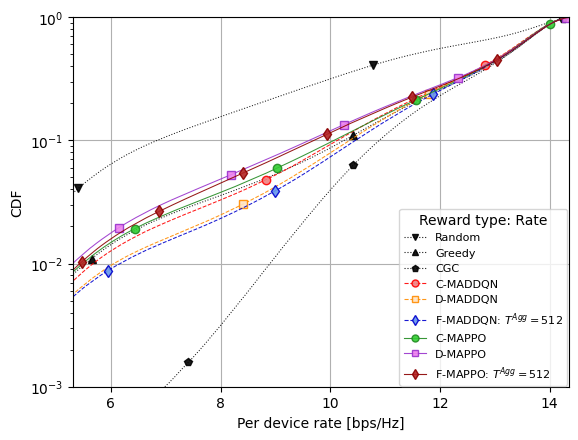

In [123]:
fname = 'evaluation_rate.pdf'
# Benchmarks are added as a file, set location of random, greedy and CGC labels as None: ALL SCATTERPOINTS
labels = [None, 'C-MADDQN', 'D-MADDQN', "F-MADDQN: $T^{" + str('Agg') + "}=512$", 'C-MAPPO', 'D-MAPPO', "F-MAPPO: $T^{" + str('Agg') + "}=512$"]
plot_settings = [{'c': 'black', 'linestyle': 'dotted', 'marker': 'v', 'marker_c': 'black'}, {'c': 'black', 'linestyle': 'dotted', 'marker': '^', 'marker_c': 'black'}, {'c': 'black', 'linestyle': 'dotted', 'marker': 'p', 'marker_c': 'black'},
                 {'c': 'red', 'linestyle': 'dashed', 'marker': 'o', 'marker_c': 'lightcoral'}, # C-MADDQN
                 {'c': 'darkorange', 'linestyle': 'dashed', 'marker': 's', 'marker_c': 'bisque'}, # D-MADDQN
                 {'c': 'mediumblue', 'linestyle': 'dashed', 'marker': 'd', 'marker_c': 'cornflowerblue'}, # F-MADQQN
                 {'c': 'forestgreen', 'linestyle': 'solid', 'marker': 'o', 'marker_c': 'limegreen'}, # C-MAPPO
                 {'c': 'darkorchid', 'linestyle': 'solid', 'marker': 's', 'marker_c': 'violet'}, # D-MAPPO
                 {'c': 'darkred', 'linestyle': 'solid', 'marker': 'd', 'marker_c': 'firebrick'}] # F-MAPPO
save_file=True

# Get data
rate_labels = []
rate_data = []
for run, label in zip(runs, labels):
    fpath = 'evaluation/' + run
    if 'benchmark' in run:
        data = loadmat(fpath)
        rate_labels.append('Random')
        rate_labels.append('Greedy')
        rate_labels.append('CGC')
        rate_data.append(data["rdm"].flatten())
        rate_data.append(data["gdy"].flatten())
        rate_data.append(data["cgc"].flatten())
    else:
        data = loadmat(fpath)
        rate_labels.append(label)
        rate_data.append(data["model"].flatten()[::100])

# Plot data
fig, ax = plt.subplots()
lim_min = np.inf
lim_max = -np.inf
i = 0
for i, (rate, label, cfg) in enumerate(zip(rate_data, rate_labels, plot_settings)):

    cdf_rate = np.arange(len(rate)) / (len(rate) - 1)
    ax.semilogy(rate, cdf_rate, label=label, c=cfg['c'], 
                linestyle=cfg['linestyle'], alpha=9/10, linewidth=0.75, marker=cfg['marker'], 
                markevery=0.2 + ((len(train_labels))-(i+1))*0.05, mfc=cfg['marker_c'], mec=cfg['c'], rasterized=True)
    if 'Random' not in label:
        lim_min = np.min([lim_min, rate[np.argwhere(cdf_rate <= 0.01)][-1]])
        lim_max = np.max([lim_max, rate[np.argwhere(cdf_rate >= 0.99)][0]])

#ax.set_xlim([lim_min, lim_max])
ax.set_xlim([lim_min, lim_max])
#ax.set_ylim([0,1])
ax.set_ylim([1e-3,1])
ax.set_xlabel('Per device rate [bps/Hz]')
ax.set_ylabel('CDF')
ax.grid()

#leg = ax.legend(loc=0, ncol=3, borderaxespad=0., scatterpoints=1, fontsize=8)
#leg.get_frame().set_edgecolor('black')
#leg.get_frame().set_boxstyle('square', pad=0.)
#leg = ax.legend(ncol=3, borderaxespad=0.1, scatterpoints=1, fontsize=8)
#for line in leg.get_lines():
#    line.set_linewidth(2.0)
leg = ax.legend(loc=4, borderaxespad=0.1, scatterpoints=1, fontsize=8)
for line in leg.get_lines():
    line.set_linewidth(0.8)
    line.set_markersize(5.0)

for run in runs:
    if 'rate' in run:
        leg.set_title('Reward type: Rate',)
        case = 'rate'
    elif 'sinr' in run:
        leg.set_title('Reward type: SINR')
        case = 'sinr'
    elif 'bina' in run:
        leg.set_title('Reward type: Binary')
        case = 'bina'

if save_file:
    fig.savefig(fname, bbox_inches='tight', dpi=100)

## Plotting of model execution time

- Bar graphs of the average execution time (time on y-axis and RL algorithms on x-axis)
- y-axis: Time
- x-axis: C-MADDQN, C-MAPPO, D-MADDQN, D-MAPPO, F-MADDQN, F-MAPPO 

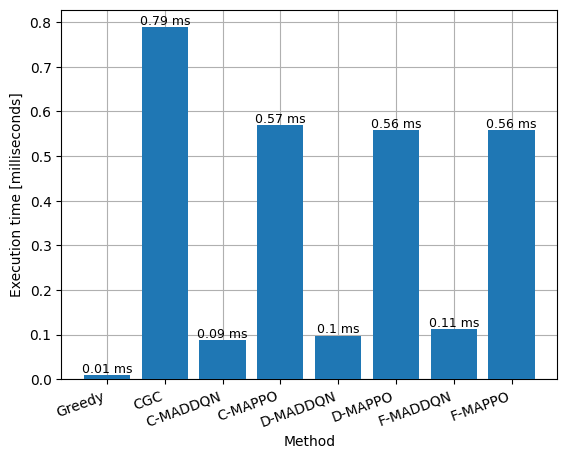

In [30]:
#run
ep = 1000
t_agg = 512
runs = [['benchmark', [None]],
        ['C-MADDQN', [f'maddqn_c-rate_sparse_{ep}ep.mat', f'maddqn_c-bina_sparse_{ep}ep.mat']],
        ['C-MAPPO', [f'mappo_c-rate_sparse_{ep}ep.mat', f'mappo_c-bina_sparse_{ep}ep.mat']],
        ['D-MADDQN', [f'maddqn_dec_d-rate_sparse_{ep}ep.mat', f'maddqn_dec_d-bina_sparse_{ep}ep.mat']],
        ['D-MAPPO', [f'mappo_dec_d-rate_sparse_{ep}ep.mat', f'mappo_dec_d-bina_sparse_{ep}ep.mat']],
        ['F-MADDQN', [f'maddqn_fed_f-rate-{t_agg}_sparse_{ep}ep.mat', f'maddqn_fed_f-bina-{t_agg}_sparse_{ep}ep.mat']],
        ['F-MAPPO', [f'mappo_fed_f-rate-{t_agg}_sparse_{ep}ep.mat', f'mappo_fed_f-bina-{t_agg}_sparse_{ep}ep.mat']]]

save_fig=False
# Get data
time_labels = []
time_data = []
for i, (label, _runs) in enumerate(runs):
    time = []
    if 'benchmark' in label:
        fpath = 'evaluation/benchmarks_sparse_1000ep.mat'
        df = loadmat(fpath)
        time_data.append(np.mean(df["gdy_time"]))
        time_labels.append('Greedy')
        time_data.append(np.mean(df["cgc_time"]))
        time_labels.append('CGC')
    else:
        for run in _runs:
            fpath = 'evaluation/' + run
            df = loadmat(fpath)
            time.append(df["time"])
        time_labels.append(label)
        time_data.append(np.mean(time))

# Plot data
fig, ax = plt.subplots()
ax.grid(zorder=1)
for i, (data, label) in enumerate(zip(time_data, time_labels)):
    data *= 1000
    ax.bar(i, data, label=label, zorder=3, color='C0')
    ax.text(i, data-0.001, f'{np.round(data,2)} ms', fontsize=9, c='black',
        horizontalalignment='center', verticalalignment='bottom')
ax.set_xticks(np.arange(len(time_labels)))
ax.set_xticklabels(time_labels, rotation=20, ha='right')
#ax.yaxis.get_major_locator().set_params(integer=True)
ax.set_ylabel('Execution time [milliseconds]')
ax.set_xlabel('Method')

if save_file:
    fig.savefig('execution_time.pdf', bbox_inches='tight', dpi=100)

# Sensitivity study
## Mean rate versus number of subnetworks 

- Benchmarks: Random, Greedy, CGC, C-MADDQN, D-MADDQN, C-MAPPO, D-MAPPO
- Test subjects: F-MADDQN and F-MAPPO
- Only one of 128/256/512/1024
- x-axis: Mean rate [bps/Hz]
- y-axis: Number of subnetworks (SPARSE)

<ErrorbarContainer object of 3 artists>

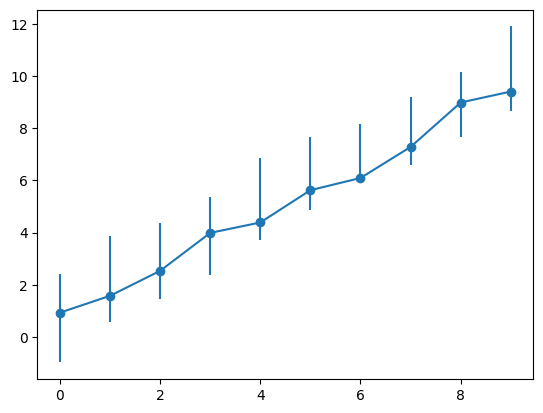

In [57]:
y = np.arange(10) + 1 - np.random.rand(10)
ymin = np.arange(10) - np.random.rand(10)
ymax = np.arange(10) + 2 + np.random.rand(10)

# This works
x = np.arange(10)
ytop = ymax-y
ybot = y-ymin
plt.errorbar(x, y, yerr=(ybot, ytop), marker='o')

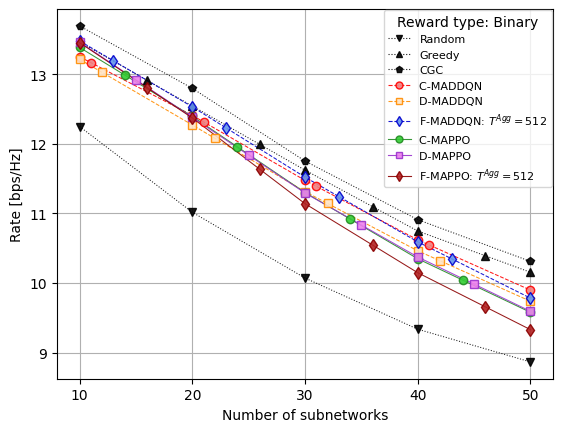

In [200]:
plot_settings = [#{'c': 'black', 'linestyle': 'dotted', 'marker': 'v', 'marker_c': 'black'}, {'c': 'black', 'linestyle': 'dotted', 'marker': '^', 'marker_c': 'black'}, {'c': 'black', 'linestyle': 'dotted', 'marker': 'p', 'marker_c': 'black'},
                 {'c': 'red', 'linestyle': 'dashed', 'marker': 'o', 'marker_c': 'lightcoral'}, # C-MADDQN
                 {'c': 'darkorange', 'linestyle': 'dashed', 'marker': 's', 'marker_c': 'bisque'}, # D-MADDQN
                 {'c': 'mediumblue', 'linestyle': 'dashed', 'marker': 'd', 'marker_c': 'cornflowerblue'}, # F-MADQQN
                 {'c': 'forestgreen', 'linestyle': 'solid', 'marker': 'o', 'marker_c': 'limegreen'}, # C-MAPPO
                 {'c': 'darkorchid', 'linestyle': 'solid', 'marker': 's', 'marker_c': 'violet'}, # D-MAPPO
                 {'c': 'darkred', 'linestyle': 'solid', 'marker': 'd', 'marker_c': 'firebrick'}] # F-MAPPO
reward = 'bina'
fpath = f'evaluation/{reward}_n_sensitivity.mat'

# Load data
mdict = loadmat(fpath)
n_agent_list = mdict["n_agent_list"][0]
labels = mdict["labels"]
runs = mdict["runs"]

def add_additional_points(i, ax, data, cfg):
    for j in range(len(data)-1):
        _data = np.linspace(data[j], data[j+1], 11)
        ax.plot(11+j*10+i, _data[i+1], c=cfg['c'], 
                linestyle=cfg['linestyle'], alpha=9/10, linewidth=0.75, marker=cfg['marker'], 
                mfc=cfg['marker_c'], mec=cfg['c'], rasterized=True, zorder=10)
fig, ax = plt.subplots()

# Plot benchmark results
avg_rdm, avg_gdy, avg_cgc = [],[],[]
for n_agent in n_agent_list:
    avg_rdm.append(mdict[f'{n_agent}_rdm_avg'.replace(" ", "")])
    avg_gdy.append(mdict[f'{n_agent}_gdy_avg'.replace(" ", "")])
    avg_cgc.append(mdict[f'{n_agent}_cgc_avg'.replace(" ", "")])
avg_rdm = np.array(avg_rdm).flatten()
avg_gdy = np.array(avg_gdy).flatten()
avg_cgc = np.array(avg_cgc).flatten()

ax.plot(n_agent_list, avg_rdm, label='Random', c='black', 
            linestyle='dotted', alpha=9/10, linewidth=0.75, marker='v',
            mfc='black', mec='black', rasterized=True)
ax.plot(n_agent_list, avg_gdy, label='Greedy', c='black', 
            linestyle='dotted', alpha=9/10, linewidth=0.75, marker='^',
            mfc='black', mec='black', rasterized=True)
add_additional_points(5, ax, avg_gdy, {'c': 'black', 'linestyle': 'dotted', 'marker': '^', 'marker_c': 'black'})
ax.plot(n_agent_list, avg_cgc, label='CGC', c='black', 
            linestyle='dotted', alpha=9/10, linewidth=0.75, marker='p',
            mfc='black', mec='black', rasterized=True)

# Plot results for models
for i, (label, (alg, run), cfg) in enumerate(zip(labels, runs, plot_settings)):
    avg_val = []
    for n_agent in n_agent_list:
        #print(reward, n_agent, label, alg, run)
        avg_val.append(mdict[f'{n_agent}_{alg}_{run}_avg'.replace(" ", "")])
    avg_val = np.array(avg_val).flatten()
    ax.plot(n_agent_list, avg_val, label=label, c=cfg['c'], 
                linestyle=cfg['linestyle'], alpha=9/10, linewidth=0.75, marker=cfg['marker'], 
                mfc=cfg['marker_c'], mec=cfg['c'], rasterized=True, zorder=3)
    add_additional_points(i, ax, avg_val, cfg)

leg = ax.legend(loc='best', borderaxespad=0.1, scatterpoints=1, fontsize=8)
for line in leg.get_lines():
    line.set_linewidth(0.8)
    line.set_markersize(5.0)
leg.set_title('Reward type: Rate') if reward=='rate' else leg.set_title('Reward type: Binary')
ax.set_xticks(n_agent_list)
ax.grid()
ax.set_ylabel('Rate [bps/Hz]')
ax.set_xlabel('Number of subnetworks')

if True:
    fig.savefig(f'{reward}_n_sensitivity.pdf', bbox_inches='tight', dpi=100)

['sparse0' 'sparse ' 'sparse2' 'dense0 ' 'dense  ' 'dense2 '] ['C-MADDQN               ' 'D-MADDQN               '
 'F-MADDQN: $T^{Agg}=512$' 'C-MAPPO                '
 'D-MAPPO                ' 'F-MAPPO: $T^{Agg}=512$ '] [['maddqn    ' 'c-rate    ']
 ['maddqn_dec' 'd-rate    ']
 ['maddqn_fed' 'f-rate-512']
 ['mappo     ' 'c-rate    ']
 ['mappo_dec ' 'd-rate    ']
 ['mappo_fed ' 'f-rate-512']]


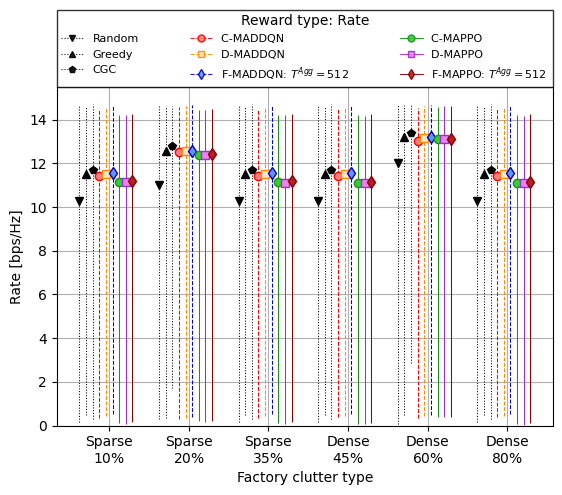

In [205]:
from matplotlib.lines import Line2D
plot_settings = [#{'c': 'black', 'linestyle': 'dotted', 'marker': 'v', 'marker_c': 'black'}, {'c': 'black', 'linestyle': 'dotted', 'marker': '^', 'marker_c': 'black'}, {'c': 'black', 'linestyle': 'dotted', 'marker': 'p', 'marker_c': 'black'},
                 {'c': 'red', 'linestyle': 'dashed', 'marker': 'o', 'marker_c': 'lightcoral'}, # C-MADDQN
                 {'c': 'darkorange', 'linestyle': 'dashed', 'marker': 's', 'marker_c': 'bisque'}, # D-MADDQN
                 {'c': 'mediumblue', 'linestyle': 'dashed', 'marker': 'd', 'marker_c': 'cornflowerblue'}, # F-MADQQN
                 {'c': 'forestgreen', 'linestyle': 'solid', 'marker': 'o', 'marker_c': 'limegreen'}, # C-MAPPO
                 {'c': 'darkorchid', 'linestyle': 'solid', 'marker': 's', 'marker_c': 'violet'}, # D-MAPPO
                 {'c': 'darkred', 'linestyle': 'solid', 'marker': 'd', 'marker_c': 'firebrick'}] # F-MAPPO

reward = 'rate'
fpath = f'evaluation/{reward}_clutter_sensitivity.mat'
mdict = loadmat(fpath)

clutter_list = mdict["clutter_list"]
labels = mdict["labels"]
runs = mdict["runs"]

print(clutter_list, labels, runs)

#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(6.4, 0.9158*4.8))
x = np.arange(6)*12

# Plot benchmark results
min_rdm, min_gdy, min_cgc = [],[],[]
avg_rdm, avg_gdy, avg_cgc = [],[],[]
max_rdm, max_gdy, max_cgc = [],[],[]
for clutter in clutter_list:
    min_rdm.append(mdict[f'{clutter}_rdm_min'.replace(" ", "")])
    avg_rdm.append(mdict[f'{clutter}_rdm_avg'.replace(" ", "")])
    max_rdm.append(mdict[f'{clutter}_rdm_max'.replace(" ", "")])
    min_gdy.append(mdict[f'{clutter}_gdy_min'.replace(" ", "")])
    avg_gdy.append(mdict[f'{clutter}_gdy_avg'.replace(" ", "")])
    max_gdy.append(mdict[f'{clutter}_gdy_max'.replace(" ", "")])
    min_cgc.append(mdict[f'{clutter}_cgc_min'.replace(" ", "")])
    avg_cgc.append(mdict[f'{clutter}_cgc_avg'.replace(" ", "")])
    max_cgc.append(mdict[f'{clutter}_cgc_max'.replace(" ", "")])

avg_gdy = np.array(avg_gdy).flatten()
avg_cgc = np.array(avg_cgc).flatten()


min_rdm = np.array(min_rdm).flatten()
avg_rdm = np.array(avg_rdm).flatten()
max_rdm = np.array(max_rdm).flatten()
ytop = max_rdm-avg_rdm
ybot = avg_rdm-min_rdm
eb = ax.errorbar(x, avg_rdm, yerr=(ybot, ytop), c='black',
                linestyle='', linewidth=0.75, marker='v', 
                mfc='black', mec='black', rasterized=True)
eb[-1][0].set_linestyle('dotted')
ax.plot(0, -1, label='Random', c='black', 
            linestyle='dotted', alpha=9/10, linewidth=0.75, marker='v', 
            mfc='black', mec='black')

min_gdy = np.array(min_gdy).flatten()
avg_gdy = np.array(avg_gdy).flatten()
max_gdy = np.array(max_gdy).flatten()
ytop = max_gdy-avg_gdy
ybot = avg_gdy-min_gdy
eb = ax.errorbar(x+1, avg_gdy, yerr=(ybot, ytop), c='black',
                linestyle='', linewidth=0.75, marker='^', 
                mfc='black', mec='black', rasterized=True)
eb[-1][0].set_linestyle('dotted')
ax.plot(0, -1, label='Greedy', c='black', 
            linestyle='dotted', alpha=9/10, linewidth=0.75, marker='^', 
            mfc='black', mec='black')

min_cgc = np.array(min_cgc).flatten()
avg_cgc = np.array(avg_cgc).flatten()
max_cgc = np.array(max_cgc).flatten()
ytop = max_cgc-avg_cgc
ybot = avg_cgc-min_cgc
eb = ax.errorbar(x+2, avg_cgc, yerr=(ybot, ytop), c='black',
                linestyle='', linewidth=0.75, marker='p', 
                mfc='black', mec='black', rasterized=True)
eb[-1][0].set_linestyle('dotted')
ax.plot(0, -1, label='CGC', c='black', 
            linestyle='dotted', alpha=9/10, linewidth=0.75, marker='p', 
            mfc='black', mec='black')

# Plot results for models
for i, (label, (alg, run), cfg) in enumerate(zip(labels, runs, plot_settings)):
    avg_val = []
    for clutter in clutter_list:
        avg_val.append(mdict[f'{clutter}_{alg}_{run}_avg'.replace(" ", "")])
    avg_val = np.array(avg_val).flatten()
    ytop = max_gdy-avg_gdy
    ybot = avg_gdy-min_gdy
    #eb = ax.errorbar(x+i+3, avg_val, yerr=(ybot, ytop), c=cfg['c'], label=label,
    eb = ax.errorbar(x+i+3, avg_val, yerr=(ybot, ytop), c=cfg['c'],
                linestyle='', linewidth=0.75, marker=cfg['marker'], 
                mfc=cfg['marker_c'], mec=cfg['c'], rasterized=True)
    eb[-1][0].set_linestyle(cfg['linestyle'])
    ax.plot(0, -1, label=label, c=cfg['c'], 
                linestyle=cfg['linestyle'], alpha=9/10, linewidth=0.75, marker=cfg['marker'], 
                mfc=cfg['marker_c'], mec=cfg['c'])


leg = ax.legend(bbox_to_anchor=(0., 1.0, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0., scatterpoints=2, fontsize=8)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_boxstyle('square', pad=0.)
for line in leg.get_lines():
    line.set_linewidth(0.8)
    line.set_markersize(5.0)
leg.set_title('Reward type: Rate') if reward=='rate' else leg.set_title('Reward type: Binary')
ax.set_xticks(x+4.5)
ax.set_xticklabels(['Sparse\n$10\\%$', 'Sparse\n$20\\%$', 'Sparse\n$35\\%$', 'Dense\n$45\\%$', 'Dense\n$60\\%$', 'Dense\n$80\\%$'])
ax.grid()
ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_ylabel('Rate [bps/Hz]')
ax.set_xlabel('Factory clutter type')


if True:
    fig.savefig(f'{reward}_clutter_sensitivity.pdf', bbox_inches='tight', dpi=100)

# Appendix

1. Maximum transition delay
2. Interference Analysis

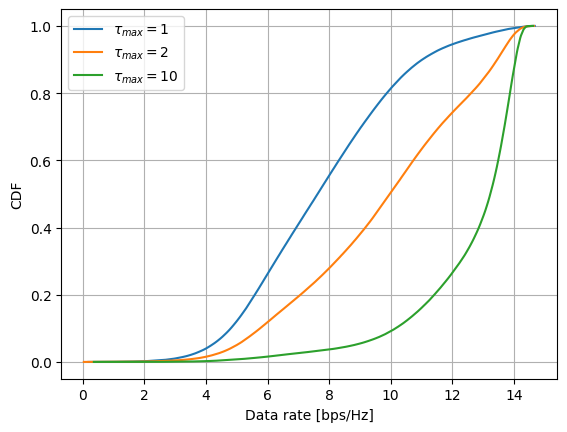

In [18]:
fpath = f'evaluation/delay_200ep.mat'
mdict = loadmat(fpath)
delay_list = [1, 2, 10]#mdict["delays"][0]

fig, ax = plt.subplots()
for delay in delay_list:

    data = np.sort(mdict[f'{delay}'].flatten())
    cdf_data = np.arange(len(data)) / (len(data) - 1)

    _label = "$\\tau_{" + str('max') + "}=" + str(delay) + "$"
    ax.plot(data, cdf_data, label=_label, rasterized=True)

ax.legend()
ax.set_xlabel('Data rate [bps/Hz]')
ax.set_ylabel('CDF')
ax.grid()
fig.savefig('max_delay_test.pdf', bbox_inches='tight', dpi=100)

[10 20 30 40 50]
['Random' 'Greedy' 'CGC   ']


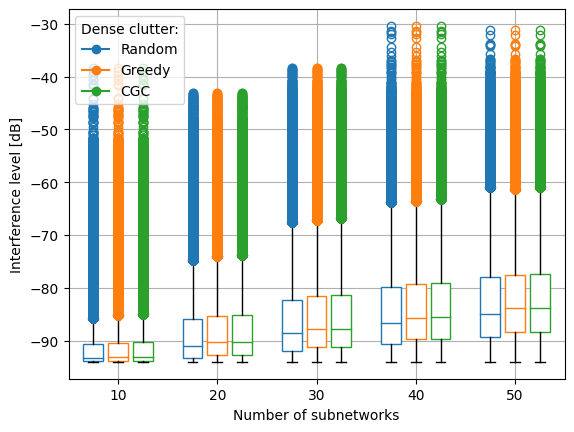

In [94]:
clutter = 'dense'
fpath = f'evaluation/interference_{clutter}_200ep.mat'
mdict = loadmat(fpath)

N_list = mdict["N_list"][0]
labels = mdict["labels"]

print(N_list)
print(labels)


c = ['C0', 'C1', 'C2']

fig, ax = plt.subplots()
for i, N in enumerate(N_list):

    for j, (alg, _c) in enumerate(zip(labels, c)):

        label = alg.replace(" ", "")
        data = mdict[f"{N}_{label}"].flatten()

        bp = ax.boxplot(data, positions=[i*4 + j], zorder=3, widths=0.8, patch_artist=True)

        bp['boxes'][0].set_color(_c)
        bp['boxes'][0].set_facecolor('white')
        bp['medians'][0].set_color(_c)
        bp['fliers'][0].set_markeredgecolor(_c)

xticks = np.arange(5)*4 + 1
ax.set_xticks(xticks)
ax.set_xticklabels(N_list)
ax.set_xlim([xticks[0]-2, xticks[-1]+2])
ax.grid()
ax.set_rasterized(True)
ax.set_xlabel('Number of subnetworks')
ax.set_ylabel('Interference level [dB]')
legend_elements = [Line2D([0],[0],color='C0',marker='o',label='Random'),
                    Line2D([0],[0],color='C1',marker='o',label='Greedy'),
                    Line2D([0],[0],color='C2',marker='o',label='CGC')]
leg = ax.legend(handles=legend_elements, loc ='upper left')
leg.set_title(f'{clutter.capitalize()} clutter:')
fig.savefig(f'{clutter}_interference_levels.pdf', bbox_inches='tight', dpi=100)